In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"

/Users/csuarezgurruchaga/Desktop/Digital-House/clase_20/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Introduccion a Machine Learning II

---

En esta práctica vamos a poner en práctica los conceptos de aprendizaje supervisado y no supervisado que estuvimos viendo.

### Aprendizaje supervisado

---

El ejercicio será entrenar un modelo de Naive Bayes Gaussiano para clasificar distintas especies de flores. Trabajaremos sobre un dataset típico en _machine learning_ conocido como [Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), el cual provee información sobre 150 muestras de este tipo de flor. Contamos con estas características: ancho y largo de sépalos y pétalos y *la etiqueta de la especie a la que corresponde cada muestra (Setosa, Versicolor y Virginica)*.

<img src="https://shahinrostami.com/images/ml-with-kaggle/iris-2338142_960_720-1.jpg">
<center><i>La flor iris</i></center>

Comencemos cargando el dataset, inspeccionando la tabla y visualizando los datos:

In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
66,5.6,3.0,4.5,1.5,versicolor
149,5.9,3.0,5.1,1.8,virginica
38,4.4,3.0,1.3,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
sns.pairplot(iris, hue='species');

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué destacamos de estas visualizaciones? ¿Existen variables que permitan distinguir entre especies?</b></label></div>
</div>

Recordemos los pasos del _workflow_ típico de Scikit-Learn:

1. Seleccionar una clase de modelo
2. Elegir los hiperparámetros del modelo
3. Preparar los datos en una matriz de _features_ y un vector _target_
4. Separar los sets de entrenamiento y de testeo
5. Ajustar el modelo a los datos de entrenamiento
6. Predecir etiquetas para datos desconocidos
7. Evaluar la _performance_ del modelo

##### 1. Seleccionar una clase de modelo

In [5]:
from sklearn.naive_bayes import GaussianNB

##### 2. Elegir los hiperparámetros del modelo

In [6]:
model = GaussianNB()

##### 3. Preparar los datos en una matriz de _features_ y un vector _target_

In [7]:
iris.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
126,6.2,2.8,4.8,1.8,virginica
2,4.7,3.2,1.3,0.2,setosa


In [8]:
# ¿Cuáles son las features y cuál es el target en este caso?
X = iris.drop('species', axis=1)
y = iris['species']

##### 4. Separar los sets de entrenamiento y de testeo

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

##### 5. Ajustar el modelo a los datos de entrenamiento

In [10]:
model.fit(Xtrain, ytrain)

GaussianNB()

##### 6. Predecir etiquetas para datos desconocidos

In [11]:
ypred = model.predict(Xtest)

print('Original: ',list(ytest[0:3]))
print('Predicho: ',ypred[0:3])

Original:  ['virginica', 'versicolor', 'virginica']
Predicho:  ['virginica' 'versicolor' 'virginica']


##### 7. Evaluar la _performance_ del modelo

$$ \text{Accuracy}=\frac{\text{predicciones correctas}}{\text{casos totales}} $$

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9736842105263158

### Aprendizaje no supervisado

---

El ejercicio será entrenar un modelo no supervisado, usando un algoritmo de clustering.

Los algoritmos de _clustering_ nos permiten segmentar las observaciones asignándolas automáticamente a distintos grupos o _clusters_, de forma de que observaciones *similares* se encuentren agrupadas y que los grupos formados sean más bien *distintos entre sí*. Recordemos que el dataset no tiene una *variable target*.

Comencemos cargando y analizando el dataset de la biblioteca Seaborn con datos de los geysers.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

geyser = sns.load_dataset('geyser')
geyser.sample(5)

,duration,waiting,kind
60,2.233,59,short
5,2.883,55,short
228,3.917,70,long
108,4.850,86,long
215,4.233,76,long


Si visualizamos los datos, vemos que la *variable kind* separa en dos grupos separados los datos. Vamos a comprobar que haciendo clustering obtenemos el mismo resultado.

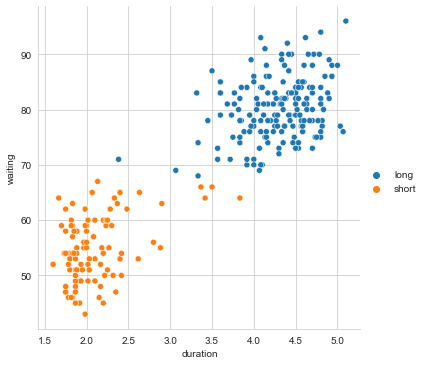

In [14]:
sns.set_style('whitegrid')
sns.relplot(data=geyser, x='duration', y='waiting', hue=geyser.kind.tolist());

*Notemos que, pese a tratarse de un problema no supervisado, el paso a paso es prácticamente igual al usado con los modelos supervisados.*

##### 1. Seleccionamos una clase de modelo

Vamos a aplicar una técnica clásica de _clustering_ llamada K-Means.

In [15]:
from sklearn.cluster import KMeans

##### 2. Elegir los hiperparámetros del modelo

n_clusters define *cuántos clusters queremos obtener* y random_state controla la aleatoriedad inicial.

In [16]:
model = KMeans(n_clusters=2, random_state=0)

##### 3. Preparar los datos en una matriz de _features_

Como se trata de un problema no supervisado, no contaremos con una variable objetivo. Por eso, construimos la matriz de _features_ descartando la variable *kind*.

In [17]:
X_geyser = geyser.drop('kind', axis=1)
X_geyser.shape

(272, 2)

Dado que K-Means es un algoritmo que trabaja *calculando distancias*, un paso previo al ajuste del modelo consiste en **estandarizar los valores**, de forma de eliminar posibles inconvenientes asociados a la escala de las distintas variables.

La clase **`StandardScaler()`**, transforma los datos, para que las variables tengan *media 0 y desvío estándar 1*.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Los transformadores también se ajustan a los datos, al igual que los estimadores:

In [19]:
scaler.fit(X_geyser)

StandardScaler()

A diferencia de los estimadores, en lugar del método `predict()`, los transformadores tienen el método `transform()`:

In [20]:
X = scaler.transform(X_geyser)

In [21]:
X[:3]

array([[ 0.09849886,  0.59712344],
       [-1.48145856, -1.24518118],
       [-0.13586149,  0.22866251]])

In [22]:
X_geyser[:3]

,duration,waiting
0,3.600,79
1,1.800,54
2,3.333,74


##### 4. Separar los sets de entrenamiento y de testeo

En los problemas de _clustering_ (y de aprendizaje no supervisado en general) *no es necesario hacer la separación de los conjuntos de entrenamiento y testeo.*

##### 5. Ajustar el modelo a los datos

In [23]:
model.fit(X)

KMeans(n_clusters=2, random_state=0)

##### 6. Predecir etiquetas

En este caso, la predicción consiste en generar etiquetas que identifiquen cada observación con un _cluster_ en particular.

Como seleccionamos k=2 clusters, las etiquetas son 0 y 1.

In [24]:
y_km = model.predict(X)
y_km[:5]

array([1, 0, 1, 0, 1], dtype=int32)

##### 7. Evaluar la _performance_ del modelo


Grafiquemos ahora un scatterplot con las dos variables originales *duration* y *waiting* , pero agregando como tercera dimensión al *cluster asignado*.

Observamos que también separa las observaciones en dos grupos separados, con mínimas diferencias respecto al valor original de la variable *kind*.

Existen métodos más formales para evaluar la performance del modelo, que veremos en las próximas clases.

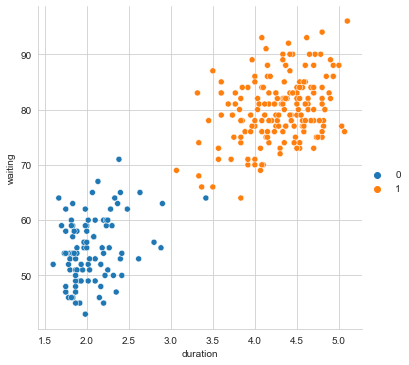

In [25]:
X_geyser['cluster'] = y_km
sns.set_style('whitegrid')
sns.relplot(data=X_geyser, x='duration', y='waiting', hue=X_geyser.cluster.tolist());